In [ ]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime


# Supress Warnings

import warnings
warnings.filterwarnings('ignore')



datetime:   date and hour in "mm/dd/yyyy hh:mm" format

season:     Four categories-> 1 = spring, 2 = summer, 3 = fall, 4 = winter

holiday:    whether the day is a holiday or not (1/0)

workingday: whether the day is neither a weekend nor holiday (1/0)

weather:    Four Categories of weather
            1-> Clear, Few clouds, Partly cloudy, Partly cloudy
            2-> Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

            3-> Light Snow and Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

            4-> Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp:       hourly temperature in Celsius

atemp:      "feels like" temperature in Celsius

humidity:   relative humidity

windspeed:  wind speed





# **IMPORTING THE DATA**

In [ ]:
# Mounting colab with google drive to access the csv from there
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
traindata = pd.read_csv("/content/drive/MyDrive/Google Colab/Bike_Data_Challenge/train.csv")
testdata = pd.read_csv("/content/drive/MyDrive/Google Colab/Bike_Data_Challenge/test.csv")

## **DATA READING**

In [ ]:
traindata.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
testdata.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
traindata.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [ ]:
testdata.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981
6492,2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65,8.9981


In [ ]:
traindata.shape

(10886, 12)

In [ ]:
testdata.shape

(6493, 11)

In [ ]:
traindata.info()
#non-null means non-nulls are allowed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  time_hour   10886 non-null  int64         
 13  time_day    10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(10)
memory usage: 1.2 MB


In [ ]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
 9   time_hour   6493 non-null   int64         
 10  time_day    6493 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(6), object(1)
memory usage: 558.1+ KB


In [ ]:
traindata.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
testdata.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
time_hour     0
time_day      0
dtype: int64

In [ ]:
traindata.shape


(10886, 12)

In [ ]:
testdata.shape

(6493, 9)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f012d6699d0>,
      dtype=object)

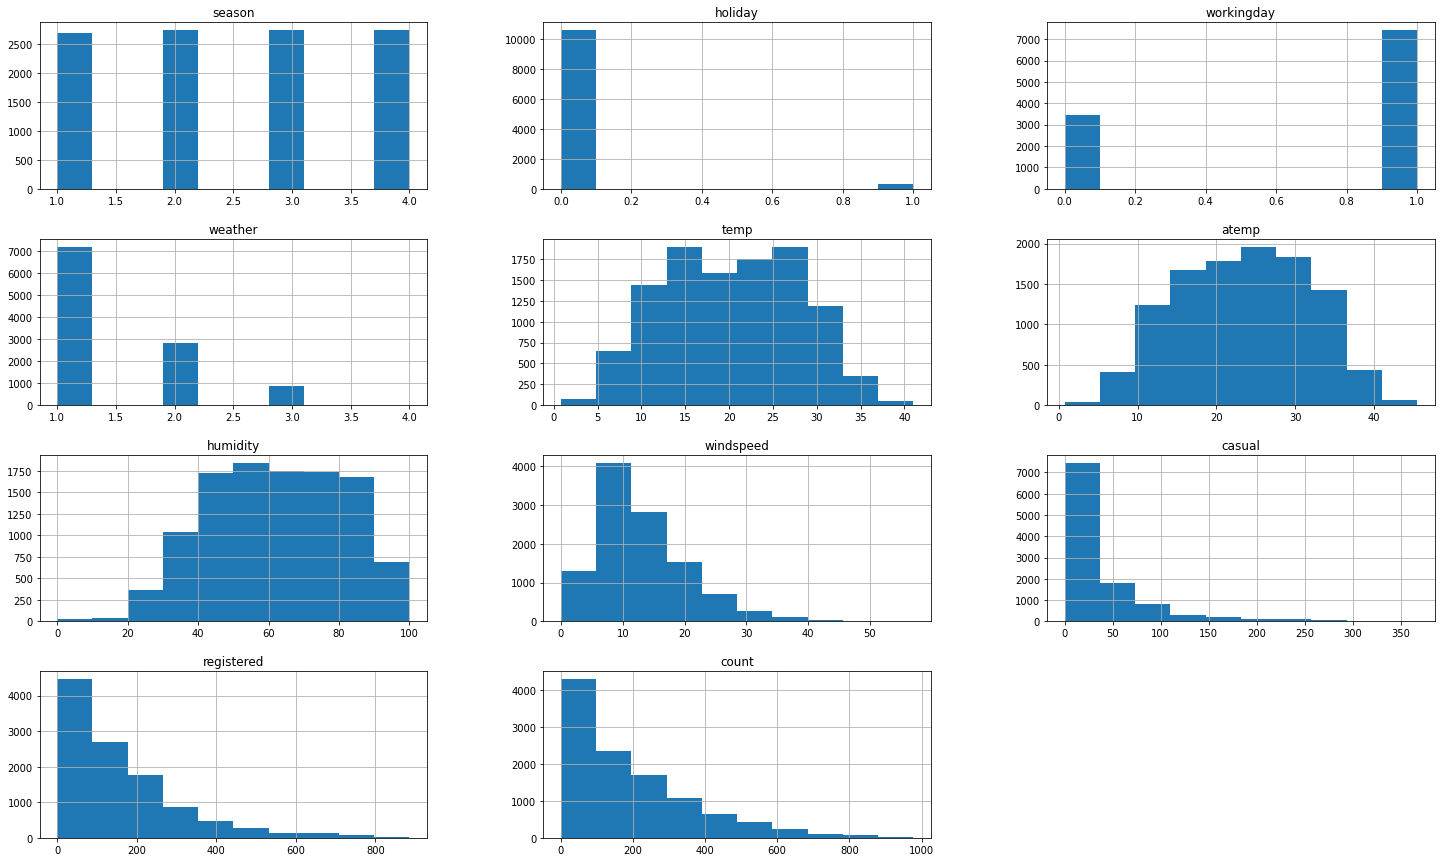

In [ ]:
traindata.hist(figsize = (25,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f012d1445d0>,
      dtype=object)

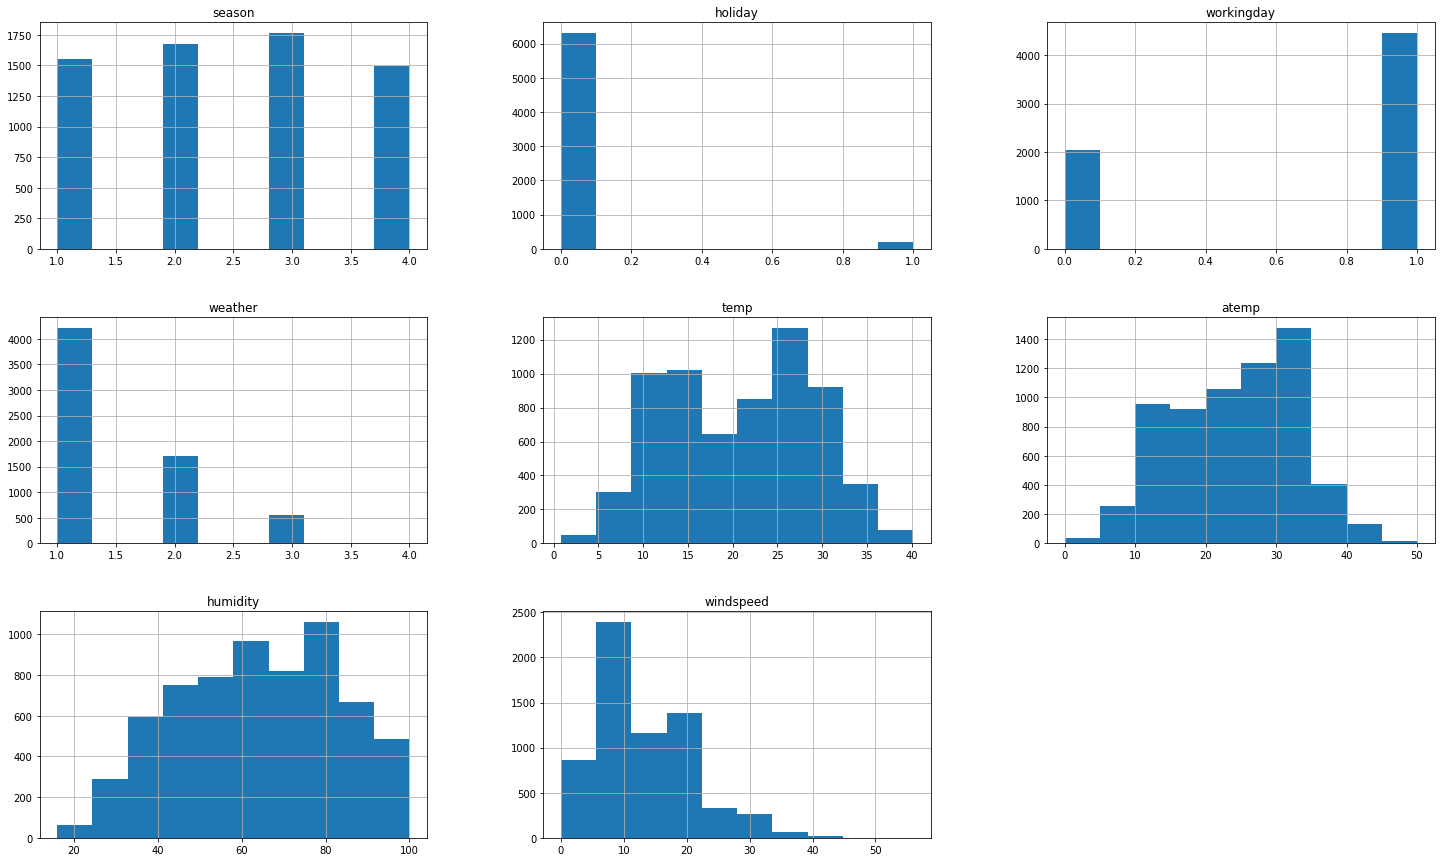

In [ ]:
testdata.hist(figsize = (25,15))

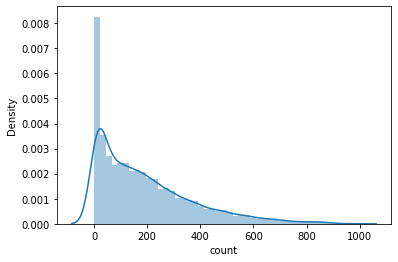

In [ ]:
sns.distplot(traindata["count"])

In [ ]:
for col in traindata:
    print("\n")
    print(col)
    print(traindata[col].unique())
    print("\n")




datetime
['2011-01-01 00:00:00' '2011-01-01 01:00:00' '2011-01-01 02:00:00' ...
 '2012-12-19 21:00:00' '2012-12-19 22:00:00' '2012-12-19 23:00:00']




season
[1 2 3 4]




holiday
[0 1]




workingday
[0 1]




weather
[1 2 3 4]




temp
[ 9.84  9.02  8.2  13.12 15.58 14.76 17.22 18.86 18.04 16.4  13.94 12.3
 10.66  6.56  5.74  7.38  4.92 11.48  4.1   3.28  2.46 21.32 22.96 23.78
 24.6  19.68 22.14 20.5  27.06 26.24 25.42 27.88 28.7  30.34 31.16 29.52
 33.62 35.26 36.9  32.8  31.98 34.44 36.08 37.72 38.54  1.64  0.82 39.36
 41.  ]




atemp
[14.395 13.635 12.88  17.425 19.695 16.665 21.21  22.725 21.97  20.455
 11.365 10.605  9.85   8.335  6.82   5.305  6.06   9.09  12.12   7.575
 15.91   3.03   3.79   4.545 15.15  18.18  25.    26.515 27.275 29.545
 23.485 25.76  31.06  30.305 24.24  18.94  31.82  32.575 33.335 28.79
 34.85  35.605 37.12  40.15  41.665 40.91  39.395 34.09  28.03  36.365
 37.88  42.425 43.94  38.635  1.515  0.76   2.275 43.18  44.695 45.455]




humidity
[ 81  80  7

In [ ]:
for col in testdata:
    print("\n")
    print(col)
    print(testdata[col].unique())
    print("\n")




datetime
['2011-01-20 00:00:00' '2011-01-20 01:00:00' '2011-01-20 02:00:00' ...
 '2012-12-31 21:00:00' '2012-12-31 22:00:00' '2012-12-31 23:00:00']




season
[1 2 3 4]




holiday
[0 1]




workingday
[1 0]




weather
[1 2 3 4]




temp
[10.66  9.84  9.02 11.48 12.3  13.12  8.2   6.56  5.74  4.92  4.1   3.28
  2.46  1.64  0.82  7.38 13.94 14.76 17.22 15.58 16.4  21.32 22.14 22.96
 18.86 18.04 19.68 20.5  23.78 25.42 27.06 28.7  30.34 31.16 27.88 24.6
 26.24 29.52 31.98 33.62 32.8  35.26 36.08 36.9  34.44 37.72 38.54 39.36
 40.18]




atemp
[11.365 13.635 12.88  10.605 16.665 14.395 15.15  15.91  12.12   9.85
  9.09   8.335  7.575  6.06   6.82   5.305  3.79   1.515  2.275  0.
  0.76   3.03   4.545 17.425 18.18  21.21  19.695 20.455 25.    25.76
 26.515 22.725 21.97  23.485 24.24  27.275 30.305 31.06  32.575 33.335
 31.82  29.545 28.79  28.03  34.09  34.85  37.12  38.635 37.88  36.365
 35.605 40.15  39.395 41.665 40.91  42.425 43.18  44.695 46.21  45.455
 47.725 49.24  50.    43.94  

In [ ]:
print(col,'\n', traindata['season'].value_counts(normalize=True))
print(col,'\n', traindata['holiday'].value_counts(normalize=True))
print(col,'\n', traindata['workingday'].value_counts(normalize=True))
print(col,'\n', traindata['weather'].value_counts(normalize=True))


windspeed 
 4    0.251148
3    0.251056
2    0.251056
1    0.246739
Name: season, dtype: float64
windspeed 
 0    0.971431
1    0.028569
Name: holiday, dtype: float64
windspeed 
 1    0.680875
0    0.319125
Name: workingday, dtype: float64
windspeed 
 1    0.660665
2    0.260334
3    0.078909
4    0.000092
Name: weather, dtype: float64


In [ ]:
# for col in traindata:
#   ax = sns.countplot(x=col, data=traindata,
#   facecolor=(0, 0, 0, 0),
#   linewidth=5,edgecolor=sns.color_palette("dark", 3))


In [ ]:
traindata.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


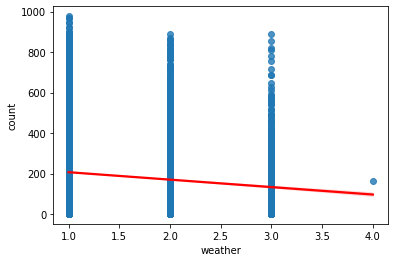

In [ ]:
# Regression plot (scatter plot +  regression line) for no of bike rentals and variables
sns.regplot(x="weather", y='count', data=traindata, line_kws = {"color" : "red"})


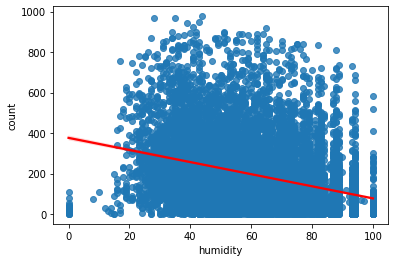

In [ ]:
sns.regplot(x="humidity", y="count", data=traindata, line_kws = {"color" : "red"})

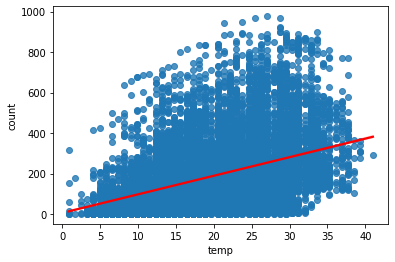

In [ ]:
sns.regplot(x="temp", y="count", data=traindata, line_kws = {"color" : "red"})

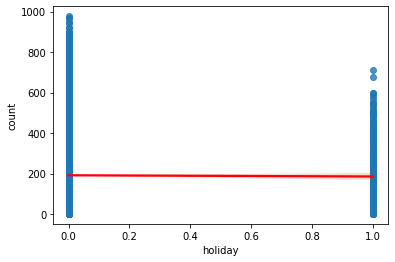

In [ ]:
sns.regplot(x="holiday", y="count", data=traindata, line_kws = {"color" : "red"})


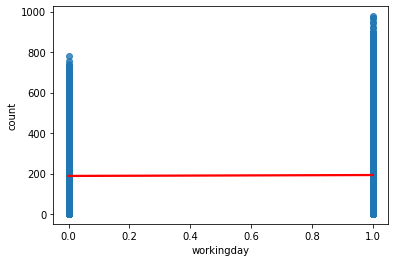

In [ ]:
sns.regplot(x="workingday", y="count", data=traindata,line_kws = {"color" : "red"})


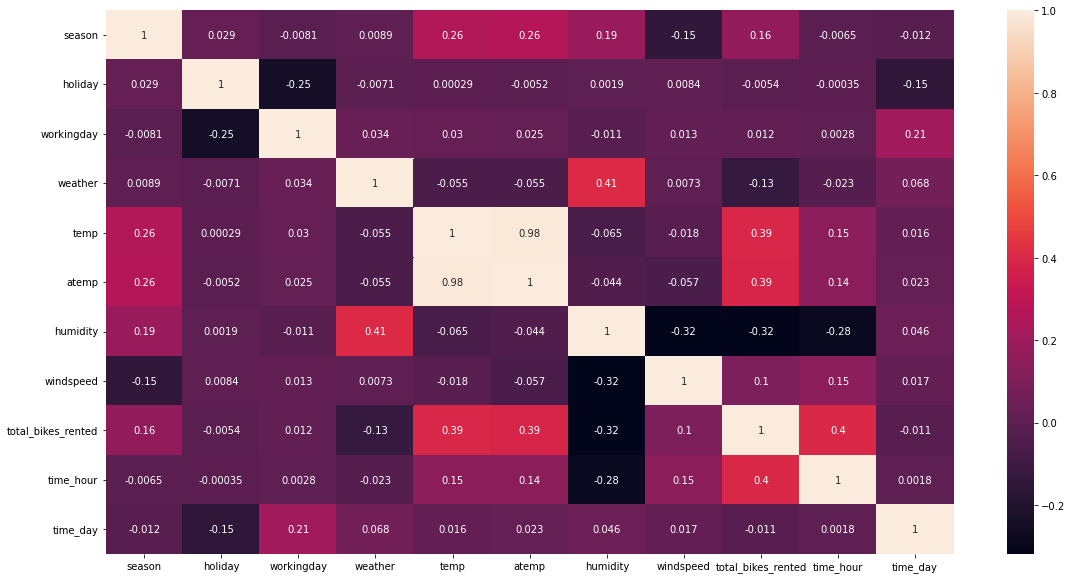

In [ ]:
# correlation matrix
bikes_correlation = traindata.corr()
plt.figure(figsize = (19,10))
sns.heatmap(bikes_correlation, annot = True)

# **DATA CLEANING**

In [ ]:
traindata.drop(columns= ['registered', 'casual'], inplace = True)

In [ ]:
traindata.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,total_bikes_rented,time_hour,time_day,hours_binned
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,0,2,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,1,2,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2,2,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,3,2,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,4,2,1


In [ ]:
traindata.rename(columns= {'count':'total_bikes_rented'}, inplace = True)


In [ ]:
testdata.rename(columns= {'count':'total_bikes_rented'}, inplace = True)


In [ ]:
# converting column 'datetime' datatype to datetime
import datetime
traindata['datetime'] = traindata['datetime'].apply(pd.to_datetime)

# extracting day from 'datetime' column
traindata['time_hour'] = traindata['datetime'].dt.hour
traindata['time_day'] = traindata['datetime'].dt.day_name()


In [ ]:
traindata.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,time_hour,time_day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,Saturday


In [ ]:
# converting column 'datetime' datatype to datetime
import datetime
testdata['datetime'] = testdata['datetime'].apply(pd.to_datetime)

# extracting day from 'datetime' column
testdata['time_hour'] = testdata['datetime'].dt.hour
testdata['time_day'] = testdata['datetime'].dt.day_name()


In [ ]:
testdata.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,time_hour,time_day
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0,Thursday
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,Thursday
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2,Thursday
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3,Thursday
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,4,Thursday


In [ ]:
traindata['time_hour'].unique()


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [ ]:
testdata['time_hour'].unique()


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [ ]:
traindata['time_day'].unique()


array(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday'], dtype=object)

In [ ]:
testdata['time_day'].unique()

array(['Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday',
       'Wednesday'], dtype=object)

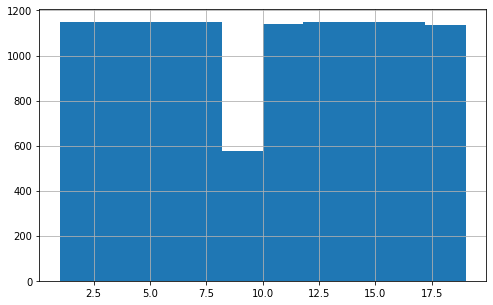

In [ ]:
traindata['time_day'].hist(figsize=(8,5))

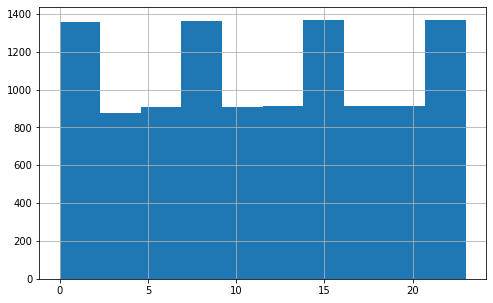

In [ ]:
traindata['time_hour'].hist(figsize=(8,5))

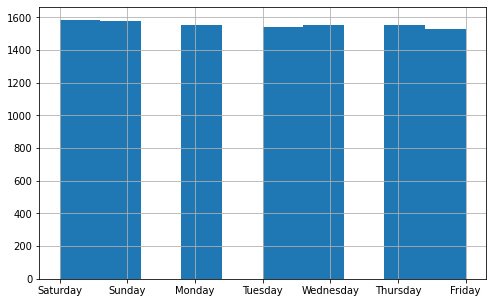

In [ ]:
traindata['time_day'].hist(figsize=(8,5))

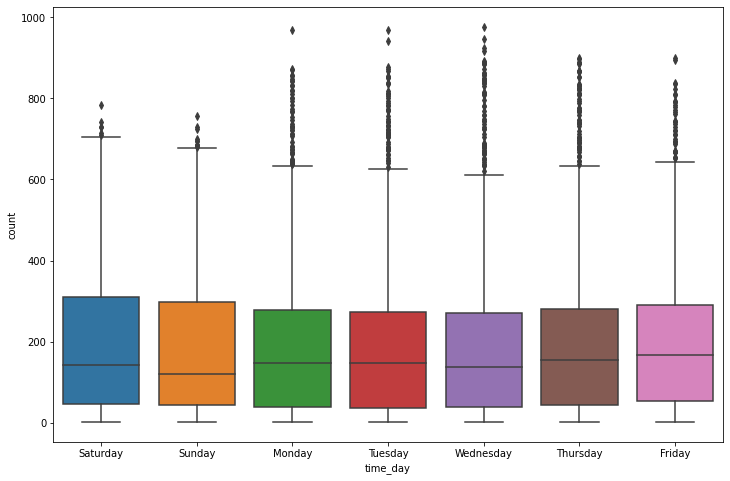

In [ ]:
plt.figure(figsize=(12,8))
import seaborn as sns
sns.boxplot(traindata['time_day'],traindata['count'])

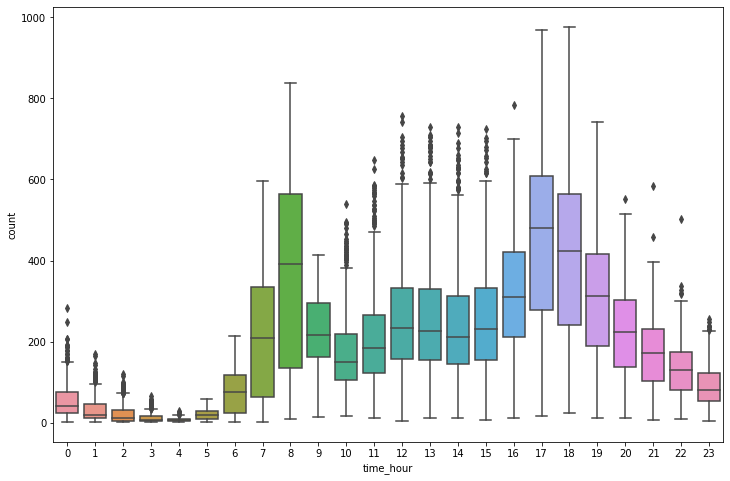

In [ ]:
plt.figure(figsize=(12,8))
import seaborn as sns
sns.boxplot(traindata['time_hour'],traindata['count'])

In [ ]:
traindata['time_day'] = traindata['time_day'].astype('category')
traindata['time_day'] = traindata['time_day'].cat.codes

In [ ]:
traindata.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,time_hour,time_day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,2
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,2
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,2


In [ ]:
testdata['time_day'] = testdata['time_day'].astype('category')
testdata['time_day'] = testdata['time_day'].cat.codes

In [ ]:
traindata.drop(columns= ['datetime'], inplace = True)


KeyError: ignored

In [ ]:
testdata.drop(columns= ['datetime'], inplace = True)

# **FEATURE ENGINEERING** 


Hour Bins


In [ ]:
# can use linspace for large data set
bins = [-1,4,8,12,16,20,23]
labels = [1,2,3,4,5,6]
traindata['hours_binned'] = pd.cut(traindata['time_hour'], bins = bins, labels = labels)

In [ ]:
traindata.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_bikes_rented,time_hour,time_day,hours_binned
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,2,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,2,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,2,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,2,1


In [ ]:
bins = [-1,4,8,12,16,20,23]
labels = [1,2,3,4,5,6]
testdata['hours_binned'] = pd.cut(testdata['time_hour'], bins = bins, labels = labels)

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

x = traindata.drop('total_bikes_rented', axis = 1)
y = traindata['total_bikes_rented']
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.3)



In [ ]:
ytest

10282    223
2452      13
5035     109
8797     233
8317     220
        ... 
3657      38
5366     222
1527     202
3328     150
1226      55
Name: total_bikes_rented, Length: 3266, dtype: int64

In [ ]:
xtrain.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,time_hour,time_day,hours_binned
6437,1,0,1,2,10.66,13.635,56,8.9981,11,1,3
5639,1,0,1,2,9.02,11.365,87,11.0014,2,5,1
5789,1,1,0,1,4.10,6.060,58,11.0014,9,1,3
7442,2,0,1,2,25.42,31.060,59,19.9995,11,6,3
3469,3,0,0,1,28.70,33.335,79,12.9980,11,3,3


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 0)
rf.fit(xtrain, ytrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
#Prediciting result on training data set
y_pred_train = rf.predict(xtrain)
y_pred_train


array([103.37      ,   3.87166667,  91.        , ..., 192.39      ,
        89.51      ,   3.63      ])

In [ ]:
#Prediciting result on trained - test data set
y_pred_test = rf.predict(xtest)
y_pred_test


array([621.96      , 217.51      ,  84.2       , ..., 164.55      ,
       444.51666667, 307.01      ])

In [ ]:
#Prediciting result on test data set
actualpred_y = rf.predict(testdata)
actualpred_y


array([13.37,  4.7 ,  5.8 , ..., 76.82, 81.7 , 47.66])

# **Model Evaluation**

In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [ ]:
def cross_val(model):
  pred = cross_val_score(model,x,y,cv=10)
  return pred.mean()

In [ ]:
def print_evaluate(true, predicted):
  MAE = metrics.mean_absolute_error(true, predicted)
  MSE = metrics.mean_squared_error(true, predicted)
  RMSE = np.sqrt(MSE)
  r2_square = metrics.r2_score(true, predicted)
  print('Mean Absolute Error (MAE) : ', MAE)
  print('Mean Squared Error (MSE) : ', MSE)
  print('Root Mean Squared Error (RMSE) : ', RMSE)
  print('Root Squared Error : ', r2_square)

  

In [ ]:
#Printing train and test results metrics
print('Train Set Evaluation:\n')
print_evaluate(ytrain, y_pred_train)
print('\n')
print('Test Set Evaluation:\n')
print_evaluate(ytest, y_pred_test)

Train Set Evaluation:

Mean Absolute Error (MAE) :  16.91466229950423
Mean Squared Error (MSE) :  679.3468944283319
Root Mean Squared Error (RMSE) :  26.064283884817012
Root Squared Error :  0.9788487910550014


Test Set Evaluation:

Mean Absolute Error (MAE) :  45.75517840861594
Mean Squared Error (MSE) :  4751.488238549564
Root Mean Squared Error (RMSE) :  68.93103973210881
Root Squared Error :  0.8619591936678346


In [ ]:
print(classification_report(ytest, y_pred_test))

NameError: ignored